In [1]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

#Data processing components
def readdata(file, strat = 'int'):
    """
    Used to read .txt file 
    
    Args:
    file (string): 
        file path
    strat (string):
        float int or string type
    """
    file = open(file, "r")
    lines = file.readlines()
    
    #processes line into a value
    
    if strat == 'float':
        for i in range(len(lines)):
            lines[i] = float(lines[i])
        return lines
    elif strat == 'int':
        for i in range(len(lines)):
            lines[i] = int(lines[i])
        return lines
    else:
        return lines
    
def readarray(file):
    file = open(file, "r")
    line_reader = csv.reader(file, delimiter=',')
    results = []
    for row in line_reader:
        temp_list = []
        for i in range(len(row)):
            temp_list.append(float(row[i]))
        
        results.append(temp_list)
    
    return results
        
def sort(train_var, train_class, x1, x2):
    """
    Find all items in train_class of two given types
    """
    var_results = []
    class_results = []
    for i in range(len(train_class)):
        if train_class[i] == x1:
            var_results.append(train_var[i])
            class_results.append(train_class[i])
        elif train_class[i] == x2:
            var_results.append(train_var[i])
            class_results.append(train_class[i])
    return var_results, class_results

In [2]:
star_data = readarray('C:\\Users\\Danny\\Desktop\\Jeremy\\Stellar classification\\star_data.csv')
star_class = readdata('C:\\Users\\Danny\\Desktop\\Jeremy\\Stellar classification\\star_class.txt')

In [3]:
data = np.array(star_data)
data_class = np.array(star_class)

In [4]:
def training_set(list, target, N):
    """
    grabs random entry's from list and returns new list of those selected entries, and second list containing target values
    
    Args:
    list list:
        variable list
    target list:
        classification list
    N int:
        number of entries to select
    """
    variable_results = []
    class_results = []
    rand_index = np.random.randint(0, 100000, size=N)
    
    for index in rand_index:
        variable_results.append(list[index])
        class_results.append(target[index])
    
    temp_data = np.array(variable_results)
    temp_class = np.array(class_results)
    return temp_data, temp_class


In [5]:
#training set of data, 1000 randomly selected elements from star data
train_var, train_class = training_set(data, data_class, 1000)
#sorted data for single neuron training, removes one class from pool of elements
sorted_data, sorted_class = sort(train_var, train_class, 0, 1)


In [6]:
#write single neuron training program from lecture to classify galaxies and quasars/stars
def sigmoid(v):
    return 1./(1+np.exp(-v))

def galaxy_neuron(x, t, max_iter):
    """
    training algorithm for galaxy/quasar binary classifier
    """
    w0 = np.array([1,1,1])
    w_hist = np.zeros([max_iter,3])
    learning_rate = 0.01
    decay = 0.0
    
    for i in range(max_iter):
        a = np.dot(x, w0)
        y = sigmoid(a)
        g = -np.dot(np.transpose(x), t-y)
        w0 = w0 - learning_rate*(g+ decay*w0)
        w_hist[i,:] = w0
    return w_hist

def usableX(training_data):
    temp_list = []
    for i in range(len(training_data)):
        temp_row = [1, training_data[i][0], training_data[i][1]]
        temp_list.append(temp_row)
        
    return np.array(temp_list)

def usable_galaxy(training_class):
    temp_list = []
    for i in training_class:
        if i == 0:
            temp_list.append(1)
        else:
            temp_list.append(0)
    
    return np.array(temp_list)

In [7]:
#test run of weight generator
weight0 = np.array([5,5,5])
test_x = usableX(sorted_data)
test_y = usable_galaxy(sorted_class)
test_weights = galaxy_neuron(test_x, test_y, 5000)
print(test_weights[-1])

[-185.48870053   29.10093583 -403.0436108 ]


C:\Users\Danny\AppData\Local\Temp\ipykernel_52256\3726141053.py:3: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-v))


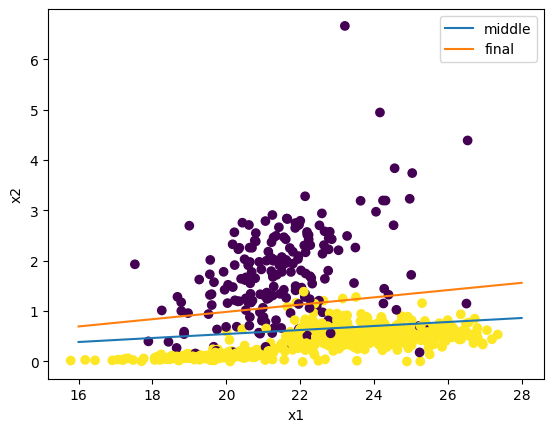

In [8]:
#visualizing test
def plane(x,w):
    return (-w[0] - x*w[1])/w[2]
plt.scatter(test_x[:,1],test_x[:,2], c=test_y)

x0 = np.linspace(16,28,20)
y0 = plane(x0, test_weights[int(len(test_weights)/2)])
plt.plot(x0, y0, label='middle')

y0 = plane(x0, test_weights[-1])
plt.plot(x0, y0, label='final')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [9]:
def results(x, w0):
    for x0 in x:
        print(sigmoid(w0[0] + w0[1]*x0[1]+w0[2]*x0[2]))
        
test_data = np.array([test_x[6], test_x[15], test_x[93]])
test_class = np.array([test_y[6], test_y[15], test_y[93]])

results(test_data, test_weights[-1])
print(test_class)

1.0
1.0
1.0
[1 1 1]


In [10]:
def usable_quasar(training_class):
    temp_list = []
    for i in training_class:
        if i == 2:
            temp_list.append(1)
        else:
            temp_list.append(0)
    return np.array(temp_list)

sorted_data2, sorted_class2 = sort(train_var, train_class, 1, 2)
test_x2 = usableX(sorted_data2)
test_y2 = usable_quasar(sorted_class2)
print(test_y2)
test_weights2 = galaxy_neuron(test_x2, test_y2, 5000)
print(test_weights2[-1])

[0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1
 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0
 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0
 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 0 0]
[  2.25755996   0.39274072 -98.3564944 ]


C:\Users\Danny\AppData\Local\Temp\ipykernel_52256\3726141053.py:3: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-v))


In [11]:
test_data2 = np.array([test_x2[6], test_x2[15], test_x2[93]])
test_class2 = np.array([test_y2[6], test_y2[15], test_y2[93]])

results(test_data2, test_weights2[-1])
print(test_class2)

2.8639319607599537e-115
0.9999480135163533
0.9998746952972208
[0 1 1]


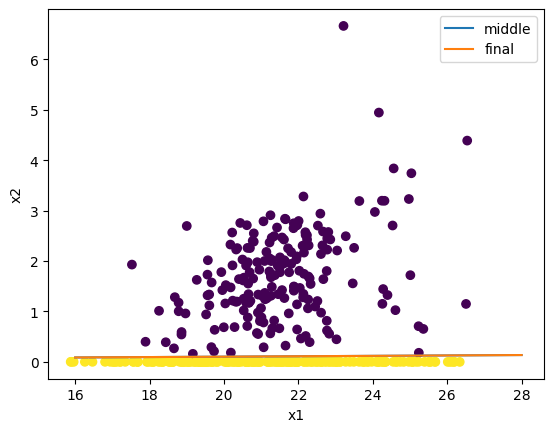

In [12]:
#visualizing qusar test
def plane(x,w):
    return (-w[0] - x*w[1])/w[2]
plt.scatter(test_x2[:,1],test_x2[:,2], c=test_y2)

x0 = np.linspace(16,28,20)
y0 = plane(x0, test_weights2[int(len(test_weights)/2)])
plt.plot(x0, y0, label='middle')

y0 = plane(x0, test_weights2[-1])
plt.plot(x0, y0, label='final')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [14]:
def neuron_3(x, w0):
    return sigmoid(w0[0] + w0[1]*x[1]+w0[2]*x[2])

def classifer_neuron(x, weights):
    """
    3 neuron neural network for stellar classification of 3 types of objects
    x is data of [1, x1 , x2]
    weights are array of[w0, w1, w2]
    """
    #takes two neuron outputs, sums, round to whole int
    neuron_result = round(neuron_3(x, weights[0]) + neuron_3(x, weights[1]))
    if neuron_result == 1:
        return 0
    elif neuron_result == 0:
        return 1
    else:
        return 2

def accuracy(test_data, test_class, weights):
    a = 0
    result_list = []
    for i in range(len(test_data)):
        result = classifer_neuron(test_data[i], weights)
        result_list.append(result)
        if result == test_class[i]:
            a += 1
    return a/(len(test_data))


In [19]:
weights = np.array([[-171.5860479, 19.04230826, -426.67639542], [8.61983593, 0.82466164, -313.70174726]])
temp_data, test_class = training_set(star_data, star_class, 3000)
test_data = usableX(temp_data)

print('Cannon Accuracy', accuracy(test_data, test_class, weights))

Cannon Accuracy 0.8203333333333334


C:\Users\Danny\AppData\Local\Temp\ipykernel_52256\3726141053.py:3: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-v))
